In [4]:
import pandas as pd
import numpy as np
import pickle

In [5]:
data = pd.read_csv('web-page-phishing.csv')
data.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# 1. Data Understanding

In [6]:
## Check the basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

****In the data, it shows it has 100.077 records and 20 columns, and all of the data type is integer.****

In [7]:
data.columns

Index(['url_length', 'n_dots', 'n_hypens', 'n_underline', 'n_slash',
       'n_questionmark', 'n_equal', 'n_at', 'n_and', 'n_exclamation',
       'n_space', 'n_tilde', 'n_comma', 'n_plus', 'n_asterisk', 'n_hastag',
       'n_dollar', 'n_percent', 'n_redirection', 'phishing'],
      dtype='object')

In [8]:
## drop unwanted column
data.drop('n_redirection', axis='columns', inplace=True)

In [9]:
## Check for summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
url_length,100077.0,39.177683,47.971847,4.0,18.0,24.0,44.0,4165.0
n_dots,100077.0,2.224397,1.255046,1.0,2.0,2.0,2.0,24.0
n_hypens,100077.0,0.405188,1.285465,0.0,0.0,0.0,0.0,43.0
n_underline,100077.0,0.137724,0.723995,0.0,0.0,0.0,0.0,21.0
n_slash,100077.0,1.135386,1.828526,0.0,0.0,0.0,2.0,44.0
n_questionmark,100077.0,0.024391,0.167789,0.0,0.0,0.0,0.0,9.0
n_equal,100077.0,0.215834,0.959802,0.0,0.0,0.0,0.0,23.0
n_at,100077.0,0.022143,0.268393,0.0,0.0,0.0,0.0,43.0
n_and,100077.0,0.143330,0.913656,0.0,0.0,0.0,0.0,26.0
n_exclamation,100077.0,0.002608,0.082207,0.0,0.0,0.0,0.0,10.0


In [10]:
## Check the total missing in each column
data.isnull().sum()

url_length        0
n_dots            0
n_hypens          0
n_underline       0
n_slash           0
n_questionmark    0
n_equal           0
n_at              0
n_and             0
n_exclamation     0
n_space           0
n_tilde           0
n_comma           0
n_plus            0
n_asterisk        0
n_hastag          0
n_dollar          0
n_percent         0
phishing          0
dtype: int64

**it shows that there is no missing value in the data**

In [11]:
## check the duplicate value in the data
data.duplicated().sum(), len(data)

(82969, 100077)

**it shows it has 78.186 duplicates from the total data of 100.077, you can remove this duplicate to reduce the bias and time efficiency for training a model**

In [12]:
# data.drop_duplicates(inplace=True)
# data.duplicated().sum(), len(data)

# 2. Data Visualization

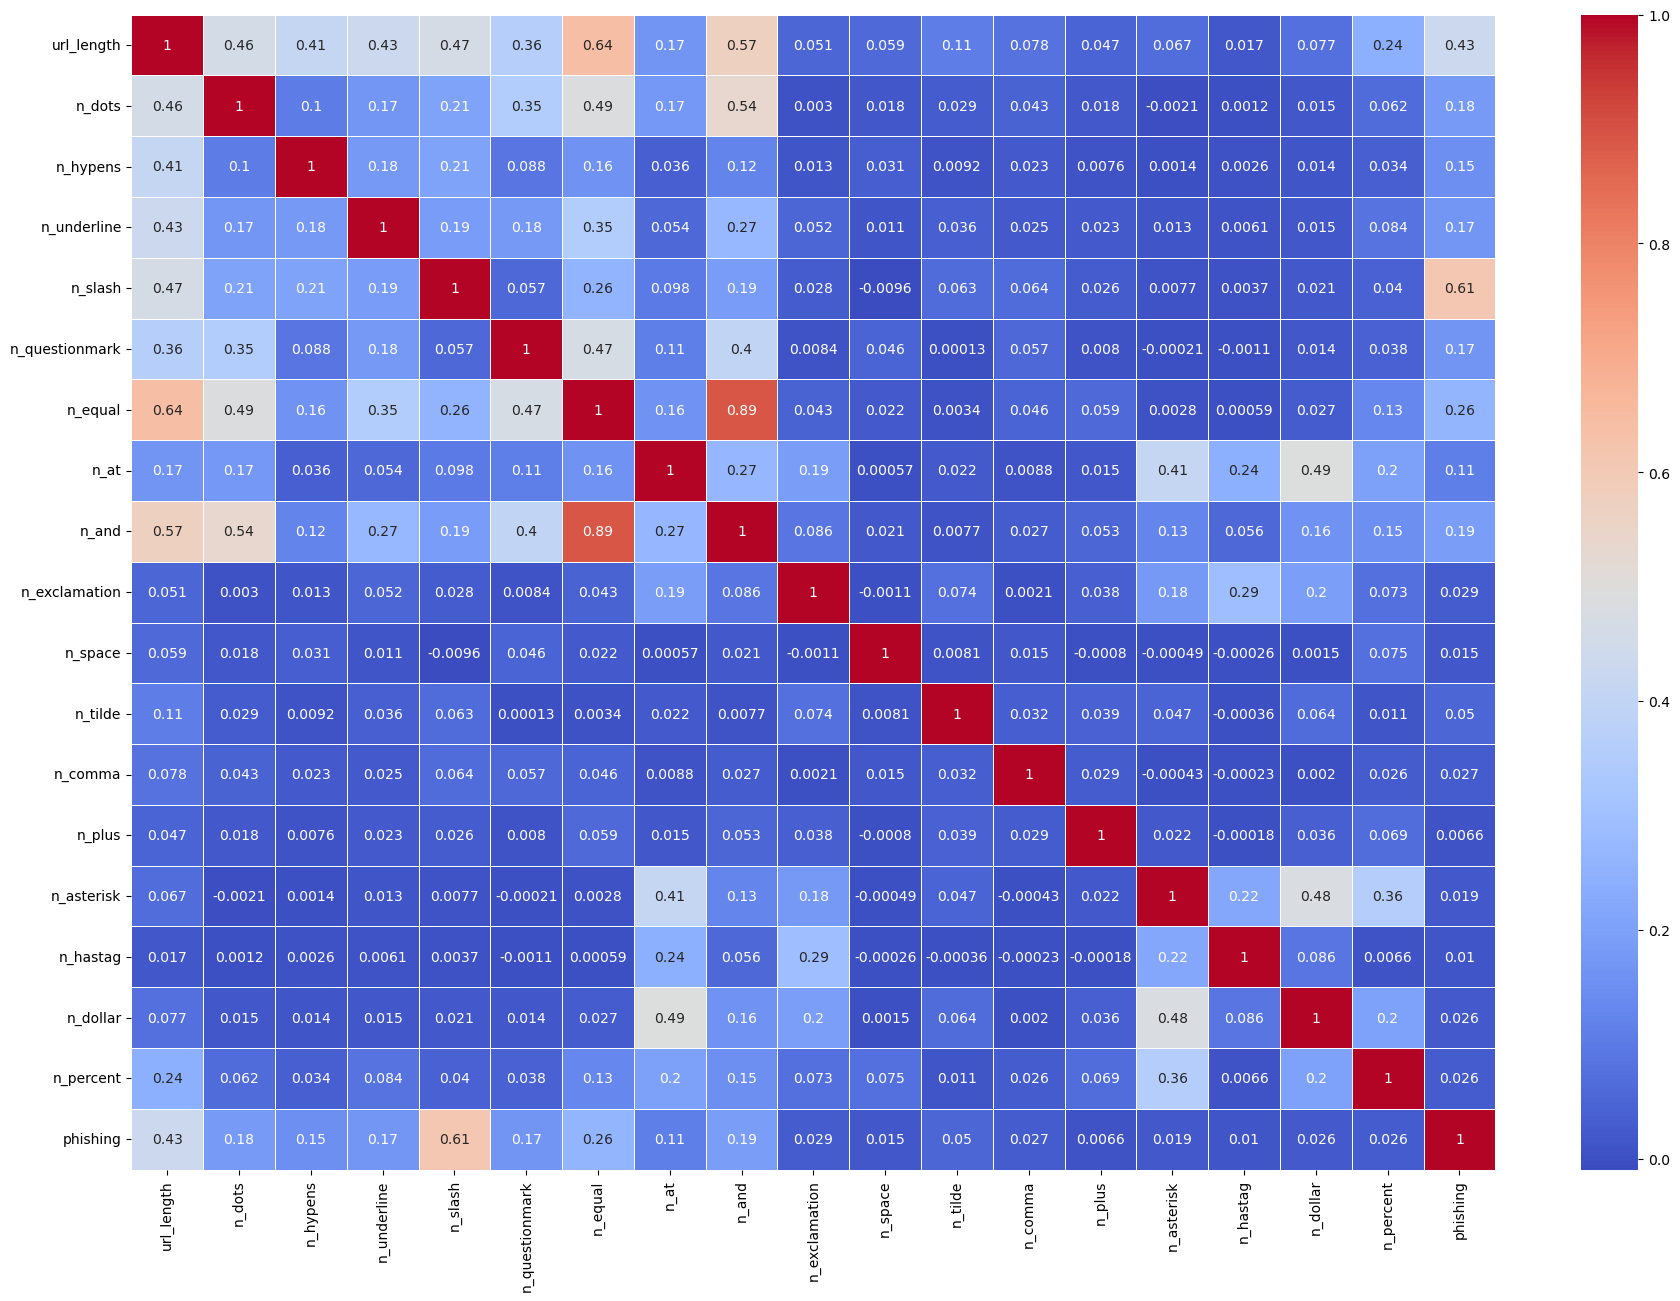

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

## Heatmap to see correlation between feature in the dataset
plt.figure(figsize=(22,15))
sns.heatmap(data=data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [14]:
## Barplot for class in output feature
round(data['phishing'].value_counts(normalize=True) * 100, 0)

0    64.0
1    36.0
Name: phishing, dtype: float64

**The percentage of phishing websites in the dataset is 36%, and the percentage of legitimate websites is 64%.**

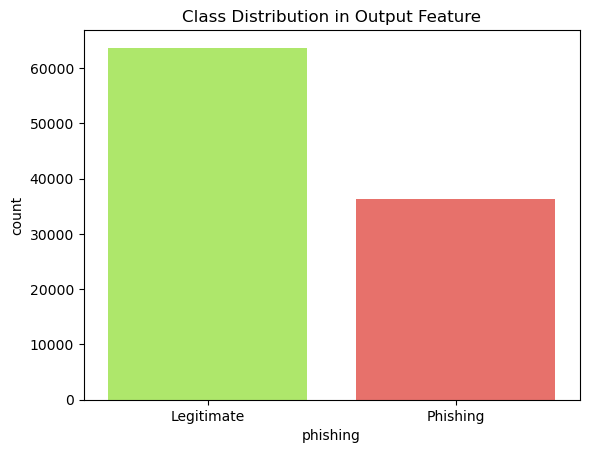

In [15]:
sns.countplot(data=data, x='phishing', palette=['#affc56', '#fc5e56'])
plt.title('Class Distribution in Output Feature')
plt.xticks([0,1],['Legitimate', 'Phishing'])
plt.show()

My focus in this notebook is not on data visualization, so I only made 2 visualizations

# 3. Model Building

In [16]:
## Divide the data into an input feature and an output feature
X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

In [17]:
## Split the data into train and test split
## I use 20% for testing data and 80% for training data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=123)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((80061, 18), (20016, 18), (80061,), (20016,))

In [18]:
## because this is an imbalanced dataset, I will do oversampling
## OVERSAMPLING
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=123)
xtrain_os, ytrain_os = ros.fit_resample(xtrain,ytrain)

In [19]:
xtrain_os.shape, ytrain_os.shape

((101974, 18), (101974,))

In [20]:
ytrain_os.value_counts(normalize=True)

1    0.5
0    0.5
Name: phishing, dtype: float64

now it's have proportion 50%:50%

In [21]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # Random Forest and AdaBoost Model
from catboost import CatBoostClassifier # Gradient Boosting Model
from xgboost import XGBClassifier # Extreme Gradient (XG) Boost Model

In [22]:
## create a function to evaluate model performance
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
def model_evaluation (true, predicted):
    accuracy = accuracy_score(true, predicted)
    confusionmatrix = confusion_matrix(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return accuracy,confusion_matrix,precision,recall

In [23]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Catboost': CatBoostClassifier(verbose=False),
    'XGboost': XGBClassifier()
}


for model_name, model in models.items():
    model.fit(xtrain_os, ytrain_os)

    y_train_pred = model.predict(xtrain_os)
    y_test_pred = model.predict(xtest)

    accuracy_train, confusion_matrix_train, precision_train, recall_train = model_evaluation(ytrain_os, y_train_pred)
    accuracy_test, confusion_matrix_test, precision_test, recall_test = model_evaluation(ytest, y_test_pred)

    print(f"Model: {model_name}")
    print(f"Train Accuracy: {accuracy_train:.4f}")
    print(f"Test Accuracy: {accuracy_test:.4f}")
    print("-" * 35)




Model: Decision Tree
Train Accuracy: 0.9085
Test Accuracy: 0.8768
-----------------------------------
Model: Random Forest
Train Accuracy: 0.9085
Test Accuracy: 0.8817
-----------------------------------
Model: Adaboost
Train Accuracy: 0.8707
Test Accuracy: 0.8729
-----------------------------------
Model: Catboost
Train Accuracy: 0.8967
Test Accuracy: 0.8831
-----------------------------------
Model: XGboost
Train Accuracy: 0.8954
Test Accuracy: 0.8809
-----------------------------------


**it shows the Random Forest,Gradient Boosting, and XGBoost model performs better among all other models for training and test performance**

# Hyperparameter Tuning

You can do hyperparameter tuning for this 3 model, and after you obtain the optimal parameter for each model, you can pass this 3 model with the best parameter to the voting classifier for higher accuracy.

In [24]:
## final classifier
from sklearn.ensemble import VotingClassifier
vc =  VotingClassifier([('clf1',RandomForestClassifier()),('clf2',CatBoostClassifier(verbose=False)),('clf3',XGBClassifier())], weights=[2,3,1])
vc.fit(xtrain_os, ytrain_os)



VotingClassifier(estimators=[('clf1', RandomForestClassifier()),
                             ('clf2',
                              <catboost.core.CatBoostClassifier object at 0x00000244971DF7C0>),
                             ('clf3',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            fea...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 weights=[2, 3, 1])

In [25]:
pickle.dump(vc, open('vc_model.pkl', 'wb'))

In [26]:
y_test_pred = vc.predict(xtest)
accuracy_test, confusion_matrix_test, precision_test, recall_test = model_evaluation(ytest, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.4f}")

Test Accuracy: 0.8840


# 4. Prediction

In [27]:
def predict(url):
    url_length = len(url)
    n_dots = url.count('.')
    n_hypens = url.count('-')
    n_underline = url.count('_')
    n_slash = url.count('/')
    n_questionmark = url.count('?')
    n_equal = url.count('=')
    n_at = url.count('@')
    n_and = url.count('&')
    n_exclamation = url.count('!')
    n_space = url.count(' ')
    n_tilde = url.count('~')
    n_comma = url.count(',')
    n_plus = url.count('+')
    n_asterisk = url.count('*')
    n_hashtag = url.count('#')
    n_dollar = url.count('$')
    n_percent = url.count('%')
    
    features = {
        'url_length': [url_length],
        'n_dots': [n_dots],
        'n_hypens': [n_hypens],
        'n_underline': [n_underline],
        'n_slash': [n_slash],
        'n_questionmark': [n_questionmark],
        'n_equal': [n_equal],
        'n_at': [n_at],
        'n_and': [n_and],
        'n_exclamation': [n_exclamation],
        'n_space': [n_space],
        'n_tilde': [n_tilde],
        'n_comma': [n_comma],
        'n_plus': [n_plus],
        'n_asterisk': [n_asterisk],
        'n_hastag': [n_hashtag],
        'n_dollar': [n_dollar],
        'n_percent': [n_percent]
    }
    
    input_df = pd.DataFrame(features)
    prediction = vc.predict(input_df)
    
    if prediction == 1:
        result = 'Phishing'
    else:
        result = 'Legitimate'
    return result



In [28]:
http://www.online-tech-tips.com/computer-tips/how-to-change-mac-address/predict('')

'Legitimate'

In [29]:
predict('http://appleid.apple.com-app.es/')

'Phishing'